In [2]:
import HOdata
import projmodules as pm
pdeas=HOdata.anceas+HOdata.anceas2+HOdata.anceas3
print pdeas
baseDir = "/mnt/solexa/mel_yang/bronzeage/data/"
fh="ind_A_v13_TBH5"
newname = 'ancEAS'
pm.indtoignore(pdeas, baseDir+fh+'.ind', baseDir+fh+'.'+newname+'.ind')
pm.convertf_par(baseDir+fh,baseDir+fh+'.'+newname+'.ped','PED',baseDir+
                'CONVERTF.'+fh+'.'+newname+'.par',indfilename=baseDir+fh+'.'+newname)

['Chokhopani', 'Mebrak', 'Samdzong', 'Boisman_MN', 'Tianyuan', 'Boshan', 'Donghuigou', 'Balikun', 'Zhougongmiao', 'Yaojia', 'Linzi', 'XianShang', 'Zongri', 'Huoshaogou', 'Wuba', 'Xiaoshuangqiao', 'Guandimiao', 'Shengedaliang', 'Muzhuzhuliang', 'Xinhua', 'Wuzhuangguo', 'Shimao', 'Tonglin', 'Dashuitian', 'Longlin', 'Bbdong', 'Taosi', 'Xinyi', 'Pukagongma', 'Redilong', 'Butaxiongqu', 'Gelintang', 'Yingpanshan', 'Mougou', 'Sanheyi', 'Yusu', 'Jinchankou', 'Jomon']


'Made par file for convertf!'

In [149]:
%%bash
pd="/mnt/solexa/mel_yang/bronzeage/admixture/" #NEED TO MOVE TO admixture/ FIRST
fh="ind_A_v13_TBH5.ancEAS"
idp=".200_25_0.5"
#cp ${pd}${fh}.ped.geno ${pd}${fh}.ped
#cp ${pd}${fh}.ped.ind ${pd}${fh}.pedind
#cut -c1-41 ${pd}${fh}.ped.snp > ${pd}${fh}.map

#echo "plink --noweb --file ${pd}${fh} --make-bed --out ${pd}${fh} --geno 0.999"
#echo "plink --noweb --file ${pd}${fh} --make-bed --out ${pd}${fh}"
#echo "plink --noweb --bfile ${pd}${fh} --indep-pairwise 200 25 0.5 --out ${pd}plink${idp}" ##Prune dataset, using 200 SNP windows, step 25 SNPs, remove SNP pairs with R^2>0.5
#echo "plink --noweb --bfile ${pd}${fh} --extract ${pd}plink${idp}.prune.in --make-bed --out ${pd}${fh}_pruned${idp}"  ##Keep set of untargeted SNPs from above

echo "plink --noweb --bfile ${pd}${fh} --extract ${pd}plink${idp}.prune.in --make-bed --out ${pd}${fh}.pdEASsnps" ##Project pd SNPs onto anc 

plink --noweb --bfile /mnt/solexa/mel_yang/bronzeage/admixture/ind_A_v13_TBH5.ancEAS --extract /mnt/solexa/mel_yang/bronzeage/admixture/plink.200_25_0.5.prune.in --make-bed --out /mnt/solexa/mel_yang/bronzeage/admixture/ind_A_v13_TBH5.ancEAS.pdEASsnps


In [147]:
%%writefile /mnt/solexa/mel_yang/bronzeage/admixture/runadmixture.sh
#%%bash
##also do cv at runadmixturecv.sh

pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH5.pdEAS_pruned.200_25_0.5"
fh="ind_A_v13_TBH5.ancEAS.pdEASsnps"
for K in `seq 2 10`; do 
    #admixture --cv ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.log${K}.out
    admixture -P ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.log${K}.out
    #admixture ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.${K}.out &
    #admixture --cv ${pd}${fh}.bed ${K} | tee ${pd}${fh}.admix.log${K}.out
    #echo "admixture --cv ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.log${K}.out"
    #echo "admixture ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.${K}.out"
done

#grep -h CV ${pd}${fh}.admix.log*out > ${pd}${fh}.admix.CVerror ##get CVerrors

Overwriting /mnt/solexa/mel_yang/bronzeage/admixture/runadmixture.sh


In [143]:
##Get same SNPs in anc for projection
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh1="ind_A_v13_TBH5.pdEAS"
fh2="ind_A_v13_TBH5.ancEAS"
subset="_pruned.200_25_0.5"
pdfile=open(pd+fh1+subset+".bim",'r')
snps=[line.split()[1] for line in pdfile]
pdfile.close()
ancfile=open(pd+fh2+".bim",'r')
newfile=open(pd+fh2+".pdEASsnps.bim",'w')
for line in ancfile: 
    if line.split()[1] in snps: newfile.write(line)
    else: continue
ancfile.close()
newfile.close()

In [150]:
%%writefile /mnt/solexa/mel_yang/bronzeage/admixture/admixtureplot.R
##MAKE ADMIXTURE PLOT
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH5.ancEAS.pdEASsnps"
mypops=c('Daur', 'Hezhen', 'Mongola', 'Naxi', 'Oroqen', 'Ulchi', 'Xibo', 
         'Dai', 'Dong', 'Gelao', 'Lahu', 'Li', 'Maonan', 'Miao', 'Mulam', 
         'She', 'Tujia', 'Yi', 'Zhuang', 'Cambodian', 'Han_Chongqing', 
         'Han_Fujian', 'Han_Guandong', 'Han_Henan', 'Han_HGDP', 'Han_Hubei', 
         'Han_Jiangsu', 'Han_NChina', 'Han_Shandong', 'Han_Shanghai', 
         'Han_Shanxi', 'Han_Sichuan', 'Han_Zhejiang', 'Kinh_Vietnam_KHV', 
         'Korean', 'Thai', 'Qiang_Horpa', 'Tibetan_Chamdo', 'Tibetan_Gangcha', 
         'Tibetan_Gannan', 'Tibetan_Lhasa', 'Tibetan_Nagqu', 'Tibetan_Shannan', 
         'Tibetan_Shigatse', 'Tibetan_Xinlong', 'Tibetan_Xunhua', 
         'Tibetan_Yajiang', 'Japanese', 'Ami_Stoneking', 'Atayal_Stoneking', 
         'Tu', 'Dongxiang', 'Kyrgyz_China', 'Kyrgyz', 'Kazakh_China', 'Kazakh', 
         'Uygur', 'Mongol', 'Tibetan_Yunnan', 'Bunun', 'Tao', 'Burmese', 
         'Vietnamese', 'Paiwan', 'Rukai', 'Hakka', 'Minnan', 'Pingpu', 
         'Atayal_Coriell', 'Ami_Coriell', 'Bonan', 'Yugur_Eastern', 
         'Yugur_Western', 'Salar', 'Malay', 'Malayan') 
mypops=c('Chokhopani', 'Mebrak', 'Samdzong', 'Boisman_MN', 'Tianyuan', 'Boshan', 
         'Donghuigou', 'Balikun', 'Zhougongmiao', 'Yaojia', 'Linzi', 'XianShang', 
         'Zongri', 'Huoshaogou', 'Wuba', 'Xiaoshuangqiao', 'Guandimiao', 'Shengedaliang', 
         'Muzhuzhuliang', 'Xinhua', 'Wuzhuangguo', 'Shimao', 'Tonglin', 'Dashuitian', 
         'Longlin', 'Bbdong', 'Taosi', 'Xinyi', 'Pukagongma', 'Redilong', 'Butaxiongqu', 
         'Gelintang', 'Yingpanshan', 'Mougou', 'Sanheyi', 'Yusu', 'Jinchankou', 'Jomon')
subset='anc_proj_pd'
num=5
for (K in c(num)) {
    tbl=read.table(paste(pd,fh,".",K,".wID.Q",sep=""))
    #print (tbl)
    #tbl=tbl[with(tbl,order(tbl[,K+3],tbl[,4],tbl[,1],tbl[,2],tbl[,3])),] ##4
    #tbl=tbl[with(tbl,order(tbl[,K+3],tbl[,1],tbl[,2])),] ##2
    tbl=tbl[with(tbl,order(tbl[,K+3],tbl[,5],tbl[,4],tbl[,2],tbl[,3],tbl[,1])),] ##5
    if (K==num){
       tblnames=c()
        for (i in tbl[,K+3]) {
        	if (i %in% mypops) {
                 if (i %in% tblnames==TRUE) {
                    tblnames=c(tblnames," ")
                }
                else {
                    tblnames=c(tblnames,i)
                }        
            }
        } 
    }
    print (tblnames)
    png(paste(pd,"images/",fh,".",subset,".",K,".png",sep=""),width=2400,height=600)
    #subtbl=subset(tbl,V7%in%mypops)[,1:4] ##4
    #subtbl=subset(tbl,V5%in%mypops)[,1:4] ##2
    subtbl=subset(tbl,V8%in%mypops)[,1:4] ##5

    barplot(t(as.matrix(subtbl)), col=rainbow(K-1),xlab="Individual #", ylab="Ancestry", border=NA,names.arg=tblnames,las=2,cex.names=0.7)
    dev.off()   
}

Overwriting /mnt/solexa/mel_yang/bronzeage/admixture/admixtureplot.R


In [151]:
%%bash
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
indfh="ind_A_v13_TBH5.ancEAS"
Qfh="ind_A_v13_TBH5.ancEAS.pdEASsnps"
K=2
for K in 5; do # 5 6 7 8 9 10; do 
    grep -v Ignore ${pd}${indfh}.ind > ${pd}${indfh}.noIgnore.ind
    paste ${pd}${Qfh}.${K}.Q ${pd}${indfh}.noIgnore.ind > ${pd}${Qfh}.${K}.wID.Q
done

In [152]:
%%bash
R CMD BATCH /mnt/solexa/mel_yang/bronzeage/admixture/admixtureplot.R
mv /home/mel_yang/notebooks/bronzeage/admixtureplot.Rout /mnt/solexa/mel_yang/bronzeage/admixture/

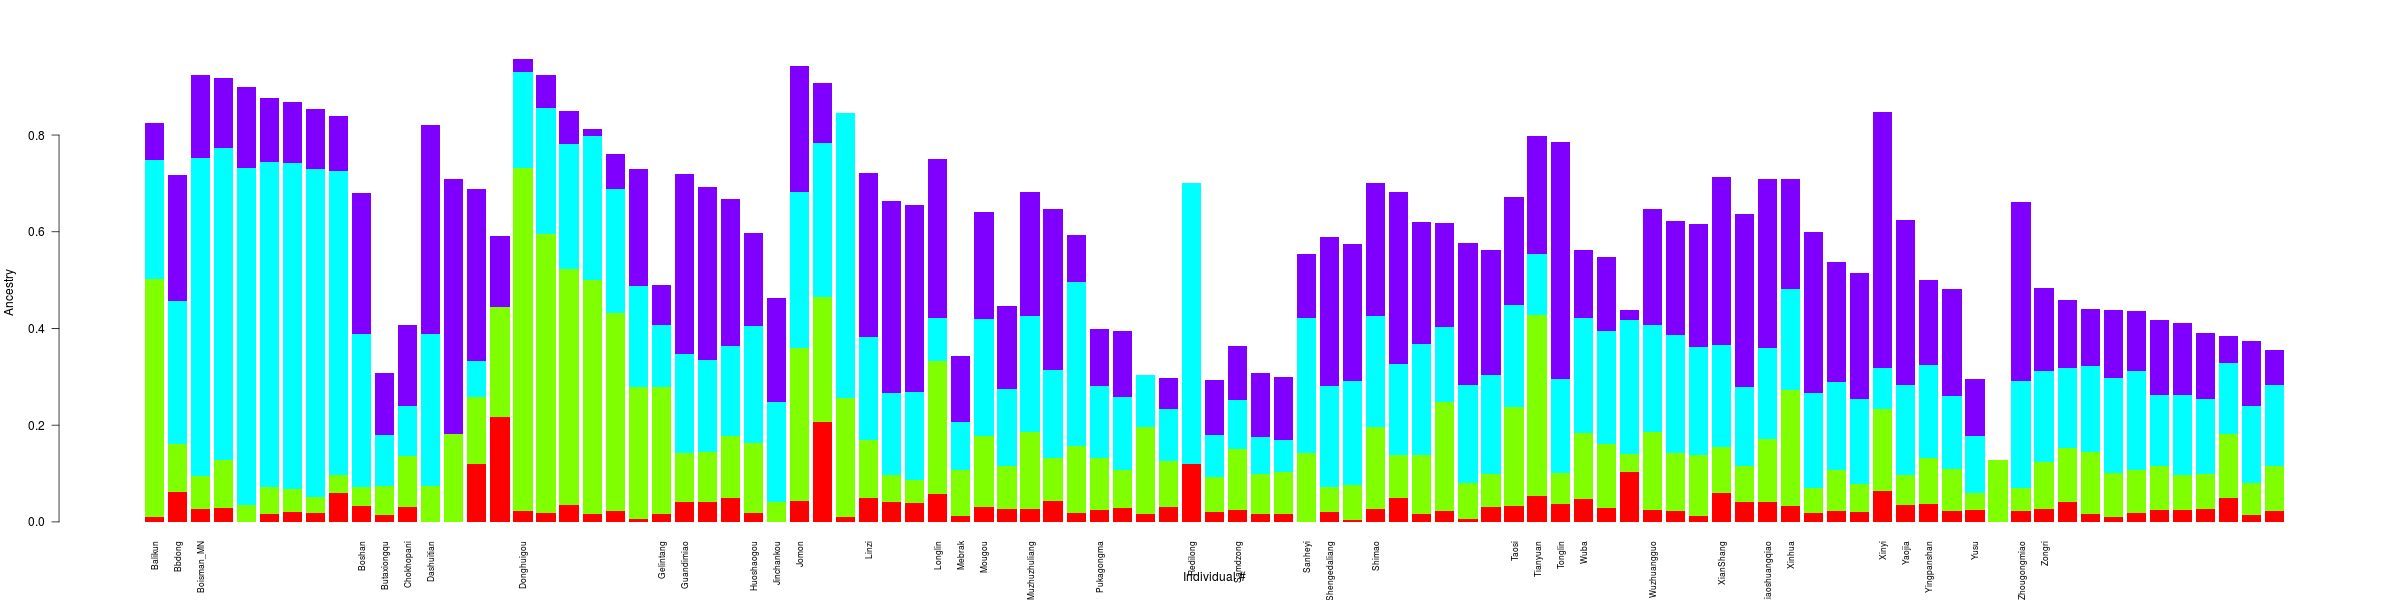

In [155]:
from IPython.core.display import Image 
pd="/mnt/solexa/mel_yang/bronzeage/admixture/images/"
#fh="ind_A_v13_TBH5.pdEAS_pruned.200_25_0.5"
fh="ind_A_v13_TBH5.ancEAS.pdEASsnps"
#subset="pd."
subset="anc_proj_pd."
K=5
Image(pd+fh+"."+subset+str(K)+".png") 

In [12]:
##MAKE .pop file for ADMIXTURE -- set certain reference popns for supervised Admixture analysis

pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH.allpdeas_weurFS"
newfh="ind_A_v13_TBH.allpdeas_weurFS_pruned.200_25_0.5"

#indfile=open(pd+fh+"_pruned.200_25_0.5.noIgnore.ind",'r')
indfile=open(pd+fh+".noIgnore.ind",'r')
newfile=open(pd+newfh+".pop",'w')
for line in indfile: 
    x=line.split()
    if x[2] in ["French","Sardinian"]: newfile.write("EUR\n")
    elif x[2] in ["Han_HGDP"]: newfile.write("CHB\n")
    else: newfile.write("-\n")
indfile.close()
newfile.close()

In [17]:
%%writefile /mnt/solexa/mel_yang/bronzeage/admixture/runsupervisedadmixture.sh
##also do cv at runadmixturecv.sh

pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH.allpdeas_weurFS_pruned.200_25_0.5"
subset="refHan_HGDP_eurFS"
for K in `seq 2 7`; do 
    echo ${K}
    #admixture --cv ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.log${K}.out
    admixture --supervised ${pd}${fh}.bed ${K} > ${pd}${fh}.ref${subset}.${K}.out &
done

#grep -h CV ${pd}${fh}.admix.log*out > ${pd}${fh}.admix.CVerror ##get CVerrors


Overwriting /mnt/solexa/mel_yang/bronzeage/admixture/runsupervisedadmixture.sh
